# Vanilla Policy Gradients for CartPole and Pong

In this notebook, you will implement a Vanilla Policy Gradient algorithm to train an agent to play CartPole (and Pong later, if desired). This uses the OpenAI gym library. Make sure you can install and run it.

In [9]:
# Some setup.

import time
import numpy as np
import matplotlib.pyplot as plt
from agents.policy_gradients import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
plt.rcParams['image.interpolation'] = 'linear'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x,y):
    """ Returns relative error. """
    return np.max( np.abs(x-y) / np.maximum(1e-8,np.abs(x)+np.abs(y)) )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Discounted Rewards

With policy gradients, we need rewards to scale the gradient terms appropriately. Implement the method `discount_rewards` and test your implementation using the following cell. For some games, such as CartPole, we can sum the rewards by considering all of the subsequent rewards for a given episode. For Pong, however, the rewards should be reset to 0 after any player scores.

You will need to take care of both cases (set by the `do_reset` parameter). Do this even if you do not plan to test with Pong.

In [12]:
test = np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,-1], np.float)
output_1 = [-0.70017483, -0.70724731, -0.71439122, -0.72160729, -0.72889625, -0.73625884,
            -0.7436958,  -0.75120788, -0.75879584, -0.76646044, -0.77420247, -1.7921237,
            -1.81022596, -1.82851107, -1.84698088, -1.86563725, -1.88448208, -1.90351725,
            -1.92274469, -0.93206535, -0.94148015, -0.95099005, -0.96059601, -0.970299,
            -0.9801,     -0.99,       -1.        ]
output_2 = [ 0.90438208,  0.91351725,  0.92274469,  0.93206535,  0.94148015,  0.95099005,
             0.96059601,  0.970299,    0.9801,      0.99,        1.,         -0.93206535,
            -0.94148015, -0.95099005, -0.96059601, -0.970299,   -0.9801,    -0.99,     -1.,
            -0.93206535, -0.94148015, -0.95099005, -0.96059601, -0.970299,  -0.9801, -0.99, -1.]

PG = PolicyGradient()
rewards_1 = PG.discount_rewards(test, do_reset=False)
rewards_2 = PG.discount_rewards(test, do_reset=True)

# Should be around 1e-9
#print(rewards_1.shape, output_1.shape)
print(rel_error(output_1, rewards_1))
print(rel_error(output_2, rewards_2))

3.32314264681e-09
2.75945073001e-09


# Policy Gradients for CartPole

There are three places in the code to fill:

1. The method `policy_backward`, which will compute the gradients.
2. In the `train` method, you need to write the gradient for the final output layer (i.e., the last gradient in the overall computational graph) and store that in a list to be used at the end of the episode.
3. Also in the `train` method, you need to utilize the discounted rewards you wrote and integrate it into the computation of the gradient. In addition, you need to keep the overall `grad_buffer` up to date.

After you complete these, you should be able to train your agent on CartPole (and Pong, if desired).

To get full credit for this portion run CartPole with `max_episodes=400`, and report the final running reward, as well as a plot of all the running reward values. (The cell after the training call should do these two automatically.) You should aim to get a final running_reward of **at least 200.00**, and the plot for the running_rewards should show a clear upward trend, though it may sometimes decrease if there are games that last abnormally long. For reference, our implementation usually achieves running rewards of 500-5000 after 400 episodes. From our experience, the performance varies a lot with CartPole; we have gotten scores as high as a million, so save any output that meets the 200-score requirement.

Some additional comments:

1. You do not need to change the default hyperparameters provided, such as `learning_rate`. If you need to change one of them to get the minimum performance -- or if you think there's a compelling reason to do so -- explain your changes in a new text/Markdown cell.

2. Please keep `print_every=2` (or some other reasonable value) so that we can spot-check the rewards and running rewards per episode.

In [74]:
action = 0 if np.random.uniform() < 0.5 else 1
print action

1


In [116]:
# Train an agent to play CartPole.
PG = PolicyGradient(D=4, H=30, learning_rate=0.01)
PG.train(environment="CartPole-v0", max_episodes=350, print_every=2)

[2016-11-21 21:38:02,143] Making new env: CartPole-v0


Ep. 2 done, reward: 12.0, running_reward: 13.9800, time (sec): 0.0092
Ep. 4 done, reward: 20.0, running_reward: 14.0404, time (sec): 0.0180
Ep. 6 done, reward: 19.0, running_reward: 14.0797, time (sec): 0.0272
Ep. 8 done, reward: 9.0, running_reward: 14.2756, time (sec): 0.0381
Ep. 10 done, reward: 18.0, running_reward: 14.2903, time (sec): 0.0422
Ep. 12 done, reward: 18.0, running_reward: 14.3542, time (sec): 0.0473
Ep. 14 done, reward: 25.0, running_reward: 14.5661, time (sec): 0.0541
Ep. 16 done, reward: 13.0, running_reward: 14.6339, time (sec): 0.0592
Ep. 18 done, reward: 22.0, running_reward: 15.3052, time (sec): 0.0735
Ep. 20 done, reward: 15.0, running_reward: 15.4476, time (sec): 0.0800
Ep. 22 done, reward: 35.0, running_reward: 15.6981, time (sec): 0.0873
Ep. 24 done, reward: 32.0, running_reward: 15.9037, time (sec): 0.0931
Ep. 26 done, reward: 39.0, running_reward: 16.1258, time (sec): 0.0994
Ep. 28 done, reward: 26.0, running_reward: 16.3916, time (sec): 0.1056
Ep. 30 done

Final CartPole running reward: 436.765669494


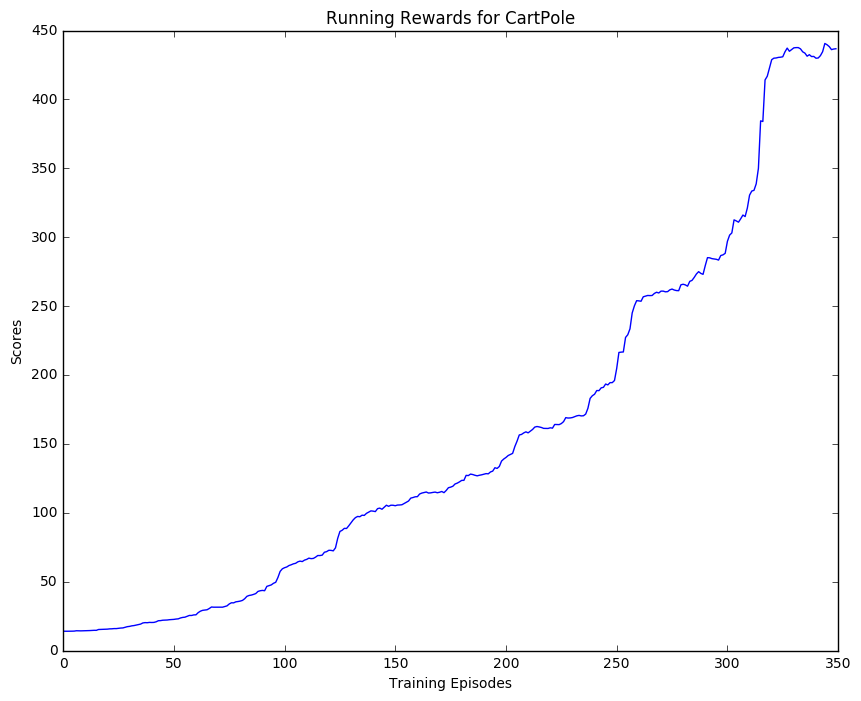

In [117]:
# Print final running_reward and plot the results.
print("Final CartPole running reward: {}".format(PG.running_rewards[-1]))
plt.figure()
plt.plot(PG.running_rewards)
plt.title("Running Rewards for CartPole")
plt.xlabel("Training Episodes")
plt.ylabel("Scores")

Most computers should be able to run larger, image-based environments like Pong. Although it will take much longer, especially on older machines, so this step is optional. To run Pong, do:

In [119]:
!pip install gym[atari]

    100% |████████████████████████████████| 757kB 652kB/s 
    100% |████████████████████████████████| 1.2MB 454kB/s 
  Running setup.py bdist_wheel for atari-py ... - \ error
  Complete output from command /Users/yunfanz/anaconda/envs/pygen2/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/vg/hmng9r4522g2pxck_5ndb1sh0000gn/T/pip-build-JqrAZr/atari-py/setup.py';exec(compile(getattr(tokenize, 'open', open)(__file__).read().replace('\r\n', '\n'), __file__, 'exec'))" bdist_wheel -d /var/folders/vg/hmng9r4522g2pxck_5ndb1sh0000gn/T/tmpDkDFBTpip-wheel- --python-tag cp27:
  running bdist_wheel
  running build
  mkdir -p build && cd build && cmake .. && make -j4
  /bin/sh: cmake: command not found
  make: *** [build] Error 127
  Could not build atari-py: Command '['make', 'build', '-C', 'atari_py/ale_interface', '-j', '3']' returned non-zero exit status 2. (HINT: are you sure cmake is installed? You might also be missing a library. Atari-py requires: zlib [insta

In [ ]:
PG = PolicyGradient(D=80*80, H=200, learning_rate=0.001)
PG.train(environment="Pong-v0", max_episodes=500, print_every=10)


In [ ]:
# Plot results.
print("Final Pong running reward: {}".format(PG.running_rewards[-1]))
plt.figure()
plt.plot(PG.running_rewards)
plt.title("Running Rewards for Pong")
plt.xlabel("Training Episodes")
plt.ylabel("Scores")

# Optional

Congratulations on implementing Policy Gradients! 

Consider doing the following extensions:

1. Run the Pong code from the cells above and tune for best performance. Summarize your results. 
2. Introduce a baseline function for the rewards. This will also require refitting the baseline; we recommend using a linear function and Numpy's linear algebra solver. 
3. Try a neural network architecture which is substantially different from the current one we are using. Try using two hidden layers (instead of one) and/or using sigmoid non-linearity.
4. Extend the model to control more than two actions. You should use a softmax output. Try it, e.g. on Pong with the default action (actions [0,2,3]). 
5. Try an environment other than CartPole or Pong and see how the same architecture works (you need to look up the documentation for OpenAI gym, and run get_action_meanings on the environment). You will need to check the following: (1) that the game can be reduced to two controls, or that you implemented part 4 above, (2) that the preprocessing procedure makes sense, and (3) that your reward discounting is appropriate - some environments restart each time a reward is returned. 

State which one of these you are doing in the following cell(s). Describe results/statistics, show at least one plot, and provide at least one conclusion in the following cell.

These experiments will generally require you to write code outside of the areas you wrote earlier, so make sure you at least put in a code comment somewhere to explain what is new.

If you do an extension, modify the names of the log files e.g. `PG.running_rewards` to keep them distinct. 

In [ ]:
# TODO Report here with plots, etc.